In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Create an empty DataFrame
df = pd.DataFrame()

# Define a function to read txt files and add labels
def read_txt_file(file_path, label):
    data = pd.read_csv(file_path, sep='\t', header=None)
    data.columns = ['frame', 'left_x', 'left_y', 'left_dil', 'left_event', 'right_x', 'right_y', 'right_dil', 'right_event']
    data['Label'] = label
    return data

# Folder path
folder_path = 'data/DIEM-data/BBC_wildlife_special_tiger_1276x720/event_data'

# Iterate over all txt files in the folder
for idx, file_name in enumerate(os.listdir(folder_path)):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        label = f'{idx+1:05d}'  # Generate labels, starting from 00001 and incrementing
        df = pd.concat([df, read_txt_file(file_path, label)], ignore_index=True)

# Display DataFrame
df.head()


,frame,left_x,left_y,left_dil,left_event,right_x,right_y,right_dil,right_event,Label
0,1,671.0,446.6,1020.0,1,632.6,501.0,1096.0,1,00001
1,2,669.5,449.8,1023.0,1,634.0,503.5,1090.0,1,00001
2,3,668.8,446.8,1028.0,1,635.6,506.0,1093.0,1,00001
3,4,672.1,449.8,1032.0,1,630.1,505.3,1094.0,1,00001
4,5,668.6,446.6,1040.0,1,634.6,501.0,1103.0,1,00001


In [2]:
df.describe()

,frame,left_x,left_y,left_dil,left_event,right_x,right_y,right_dil,right_event
count,215950.00000,215950.000000,215950.000000,215950.000000,215950.000000,215950.000000,215950.000000,215950.000000,215950.000000
mean,2160.00000,612.731235,491.128272,1426.614073,1.009650,639.669523,508.415714,1402.015536,0.941246
std,1246.79076,242.779088,174.637069,561.076136,0.397655,231.826296,170.244992,509.417288,0.239168
min,1.00000,-978.500000,-573.100000,0.000000,-1.000000,-928.400000,-924.500000,0.000000,-1.000000
25%,1080.00000,491.700000,420.600000,1151.000000,1.000000,521.800000,432.000000,1136.000000,1.000000
50%,2160.00000,630.200000,507.400000,1431.000000,1.000000,651.600000,515.100000,1398.000000,1.000000
75%,3240.00000,774.300000,594.900000,1726.000000,1.000000,796.800000,606.300000,1703.000000,1.000000
max,4319.00000,2312.100000,1902.800000,3486.000000,2.000000,2276.900000,1909.000000,2998.000000,1.000000


### Divide the dropped frames 

In [3]:
# Delete lines with eye-tracking errors
filter_df = df[df['left_event'] != -1]
filter_df = filter_df[filter_df['right_event'] != -1]


# Create histograms of the distribution of left_dil and right_dil

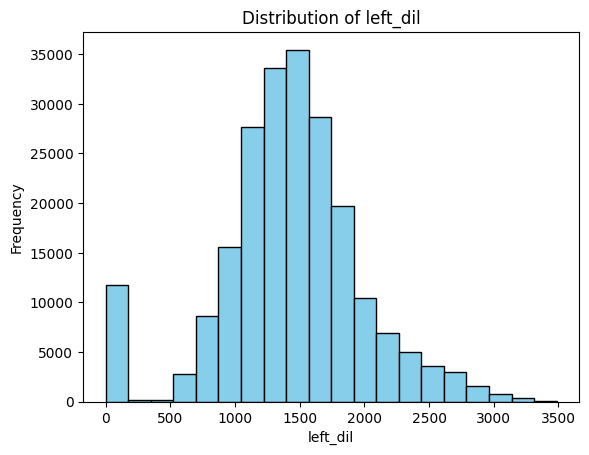

In [4]:
plt.hist(df['left_dil'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of left_dil')
plt.xlabel('left_dil')
plt.ylabel('Frequency')
plt.show()


In [5]:
# caculae the number of 0 in left_dil column
num_zeros = (df['left_dil'] == 0).sum()
num_zeros2 = (df['right_dil'] == 0).sum()
num_zeros,num_zeros2

(11720, 8648)

We can find outliers in the part of the distribution where the data is zero, so we will be aware of these outliers for subsequent processing


### filter the left_dil=0 &  right_dil=0

In [6]:
# Boolean index based on some column not equal to 0
filter_df = filter_df[filter_df['left_dil'] != 0]
filter_df = filter_df[filter_df['right_dil'] != 0]
filter_df = filter_df[filter_df['left_x'] != 0]
filter_df = filter_df[filter_df['left_y'] != 0]
filter_df = filter_df[filter_df['right_x'] != 0]
filter_df = filter_df[filter_df['right_y'] != 0]


In [7]:
num_left_dil_data = filter_df['left_dil'].count()
num_left_dil_data2=filter_df['right_dil'].count()
num_left_dil_data,num_left_dil_data2


(203325, 203325)

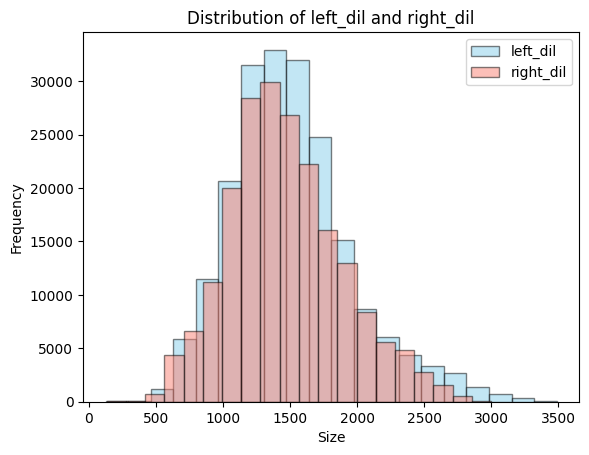

In [8]:
# Plot the histogram of left_dil
plt.hist(filter_df['left_dil'], bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='left_dil', histtype='bar')

# Plot the histogram of right_dil
plt.hist(filter_df['right_dil'], bins=20, color='salmon', edgecolor='black', alpha=0.5, label='right_dil', histtype='bar')

# Add title and labels
plt.title('Distribution of left_dil and right_dil')
plt.xlabel('Size')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Display histogram
plt.show()


In Figure , we can see that the distribution of the pupils of the left eye and the right eye are left skewed, and we can see that the distribution of the pupil size of the left eye is more spread out and a little larger than that of the right eye. 

# Create a scatter plot of the pupil size of the left and right eye


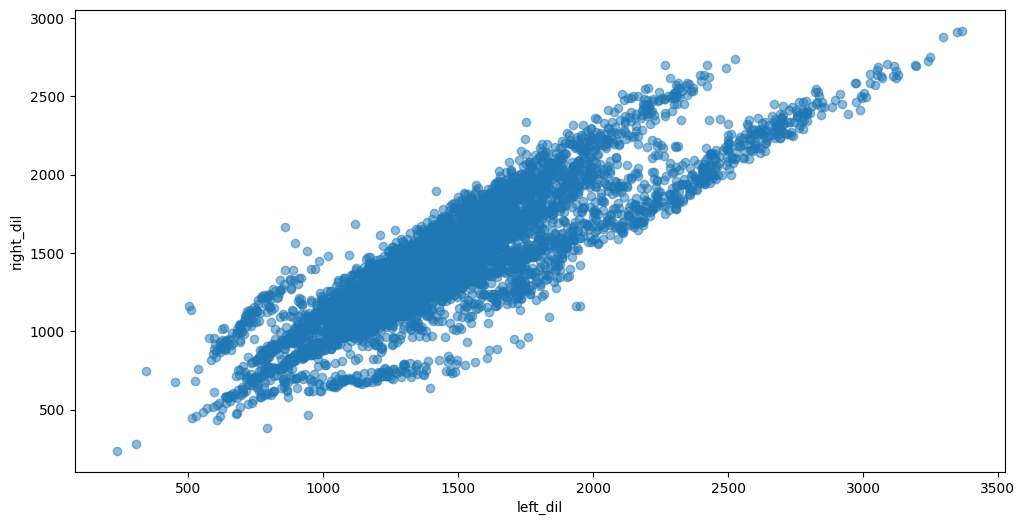

In [9]:

# Due to the reason that the dataset is too big
# Randomly select 1000 rows of data from DataFrame
random_sample_df = filter_df.sample(n=5000, random_state=12)

data = random_sample_df[["left_dil", "right_dil"]].values
x = data[:, 0]
y = data[:, 1]

def plot_scatter(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.scatter(x, y,alpha=0.5)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    
    return ax

ax = plot_scatter(x, y, "left_dil", "right_dil")
plt.show()

In Figure , we can see that the pupil sizes of the left and right eyes are basically the same, but in some cases, the pupil of one eye is slightly larger than that of the other eye. And we can see that the pupil size of the right eye is often larger than that of the left eye, probably because the pupil of the right eye reacts faster than that of the left eye.

# Create a scatter plot of where the left and right eyes focus


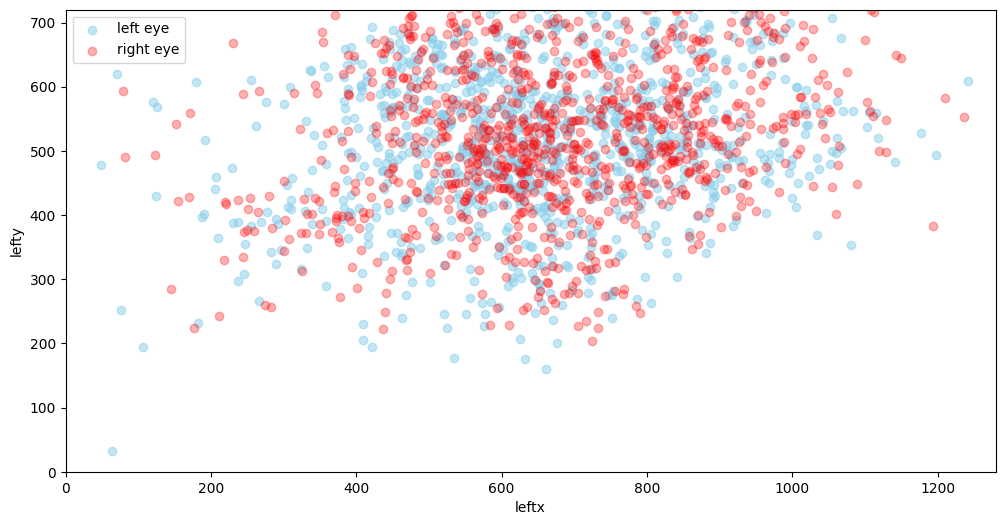

In [10]:
# Due to the reason that the dataset is too big
# Randomly select 1000 rows of data from DataFrame
random_sample_df = filter_df.sample(n=1000, random_state=13)

def plot_scatter(x1, y1, x2, y2, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.scatter(x1, y1, alpha=0.5, label='left eye',color='skyblue')
    ax.scatter(x2, y2, alpha=0.3, label='right eye',color='red')
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.legend()
    
    # set xlim & ylim
    ax.set_xlim([0, 1280])
    ax.set_ylim([0, 720])

    return ax

# left eye data
data = random_sample_df[["left_x", "left_y"]].values
x1 = data[:, 0]
y1 = data[:, 1]

# right eye data
data2 = random_sample_df[["right_x", "right_y"]].values
x2 = data2[:, 0]
y2 = data2[:, 1]

ax = plot_scatter(x1, y1, x2, y2, "leftx", "lefty")
plt.show()


We can see from the graph that the right eye tends to focus more on the video, a little more towards the centre, while the left eye's focus is a little more spread out compared to the right eye, paying more attention to the periphery

# Create visual focus through left and right eye focus


In [11]:
# Calculate focus_x and focus_y and add them to the DataFrame
filter_df['focus_x'] = (filter_df['left_x'] + filter_df['right_x']) / 2
filter_df['focus_y'] = (filter_df['left_y'] + filter_df['right_y']) / 2
filter_df['dil'] = (filter_df['left_dil'] + filter_df['right_dil']) / 2

filter_df.head()

,frame,left_x,left_y,left_dil,left_event,right_x,right_y,right_dil,right_event,Label,focus_x,focus_y,dil
0,1,671.0,446.6,1020.0,1,632.6,501.0,1096.0,1,00001,651.80,473.80,1058.0
1,2,669.5,449.8,1023.0,1,634.0,503.5,1090.0,1,00001,651.75,476.65,1056.5
2,3,668.8,446.8,1028.0,1,635.6,506.0,1093.0,1,00001,652.20,476.40,1060.5
3,4,672.1,449.8,1032.0,1,630.1,505.3,1094.0,1,00001,651.10,477.55,1063.0
4,5,668.6,446.6,1040.0,1,634.6,501.0,1103.0,1,00001,651.60,473.80,1071.5


In [12]:
# make a coolwarm graph
corr = filter_df.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,frame,left_x,left_y,left_dil,left_event,right_x,right_y,right_dil,right_event,focus_x,focus_y,dil
frame,1.000000,-0.253379,-0.150193,-0.005932,0.013174,-0.233926,-0.147285,-0.011297,-0.010344,-0.245792,-0.154557,-0.008796
left_x,-0.253379,1.000000,0.211423,-0.082507,-0.011129,0.966578,0.195279,-0.042490,-0.007346,0.991742,0.211359,-0.065347
left_y,-0.150193,0.211423,1.000000,-0.143951,-0.050915,0.200811,0.852572,-0.134770,-0.199930,0.207903,0.963097,-0.144154
left_dil,-0.005932,-0.082507,-0.143951,1.000000,0.012761,-0.003535,-0.063434,0.873659,0.060023,-0.043700,-0.108101,0.970313
left_event,0.013174,-0.011129,-0.050915,0.012761,1.000000,-0.013730,-0.040270,0.004169,0.250643,-0.012524,-0.047420,0.008912
right_x,-0.233926,0.966578,0.200811,-0.003535,-0.013730,1.000000,0.212406,0.016551,-0.024775,0.991476,0.214619,0.006332
right_y,-0.147285,0.195279,0.852572,-0.063434,-0.040270,0.212406,1.000000,-0.092487,-0.172838,0.205499,0.961772,-0.079976
right_dil,-0.011297,-0.042490,-0.134770,0.873659,0.004169,0.016551,-0.092487,1.000000,0.055802,-0.013314,-0.118253,0.965394
right_event,-0.010344,-0.007346,-0.199930,0.060023,0.250643,-0.024775,-0.172838,0.055802,1.000000,-0.016127,-0.193780,0.059912
focus_x,-0.245792,0.991742,0.207903,-0.043700,-0.012524,0.991476,0.205499,-0.013314,-0.016127,1.000000,0.214778,-0.030043


We can see from coolwarm that the focus point of the left eye and the focus point of the right eye are strongly correlated, and the pupil size of the left eye and the right eye are also strongly correlated, but we can find that there is basically no relationship between the events of the left eye and the events of the right eye, so we can't combine all of the data of the left eye and the right eye together in order to reduce the amount of data analysis.

# Add other data

In [13]:
import os
import pandas as pd

# Create an empty DataFrame
df = pd.DataFrame()

# Define a function to read txt files and add labels
def read_txt_file(file_path, label, new_column_name, new_column_value):
    data = pd.read_csv(file_path, sep='\t', header=None)
    data.columns = ['frame', 'left_x', 'left_y', 'left_dil', 'left_event', 'right_x', 'right_y', 'right_dil', 'right_event']
    data['Label'] = label
    data[new_column_name] = new_column_value
    return data

# Multiple folder paths and new column information
folder_paths = [
    ('data/DIEM-data/BBC_wildlife_special_tiger_1276x720/event_data', 'file_name', 'tiger'),
    ('data/DIEM-data/chilli_plasters_1280x712/event_data', 'file_name', 'chilli'),
    ('data/DIEM-data/BBC_wildlife_serpent_1280x704/event_data', 'file_name', 'serpent'),
    ('data/DIEM-data/BBC_wildlife_eagle_930x720/event_data', 'file_name', 'eagle'),
    ('data/DIEM-data/basketball_of_sorts_960x720/event_data', 'file_name', 'basketball'),
    ('data/DIEM-data/BBC_life_in_cold_blood_1278x710/event_data', 'file_name', 'coldblood'),
    ('data/DIEM-data/arctic_bears_1066x710/event_data', 'file_name', 'bear'),
    ('data/DIEM-data/Antarctica_landscape_1246x720/event_data', 'file_name', 'Antarctica'),
    ('data/DIEM-data/ami_ib4010_closeup_720x576/event_data', 'file_name', 'ami'),
    ('data/DIEM-data/advert_iphone_1272x720/event_data', 'file_name', 'iphone'),
    ('data/DIEM-data/advert_bravia_paint_1280x720/event_data', 'file_name', 'bravia_paint'),
    ('data/DIEM-data/advert_bbc4_library_1024x576/event_data', 'file_name', 'library'),
    ('data/DIEM-data/advert_bbc4_bees_1024x576/event_data', 'file_name', 'bees'),
    ('data/DIEM-data/50_people_london_1280x720/event_data', 'file_name', 'london'),
    ('data/DIEM-data/50_people_brooklyn_1280x720/event_data', 'file_name', 'brooklyn'),
]

# Iterate over each folder
for folder_path, new_column_name, new_column_value in folder_paths:
    # Iterate over all txt files in the folder
    for idx, file_name in enumerate(os.listdir(folder_path)):
        if file_name.endswith('.txt'):
            file_path = os.path.join(folder_path, file_name)
            label = f'{idx+1:05d}'  # Generate labels, starting from 00001 and incrementing
            df = pd.concat([df, read_txt_file(file_path, label, new_column_name, new_column_value)], ignore_index=True)

# Display DataFrame
df


,frame,left_x,left_y,left_dil,left_event,right_x,right_y,right_dil,right_event,Label,file_name
0,1,671.0,446.6,1020.0,1,632.6,501.0,1096.0,1,00001,tiger
1,2,669.5,449.8,1023.0,1,634.0,503.5,1090.0,1,00001,tiger
2,3,668.8,446.8,1028.0,1,635.6,506.0,1093.0,1,00001,tiger
3,4,672.1,449.8,1032.0,1,630.1,505.3,1094.0,1,00001,tiger
4,5,668.6,446.6,1040.0,1,634.6,501.0,1103.0,1,00001,tiger
...,...,...,...,...,...,...,...,...,...,...,...
2418800,3663,866.4,408.6,1672.0,1,868.8,395.0,1697.0,1,00126,brooklyn
2418801,3664,862.1,415.7,1676.0,1,873.1,385.6,1695.0,1,00126,brooklyn
2418802,3665,856.3,413.5,1672.0,1,879.3,386.4,1699.0,1,00126,brooklyn
2418803,3666,857.8,413.5,1683.0,1,880.8,386.5,1702.0,1,00126,brooklyn


In [14]:
# Delete lines with eye-tracking errors
filter_df = df[df['left_event'] != -1]
filter_df = filter_df[filter_df['right_event'] != -1]

filter_df = filter_df[filter_df['left_dil'] != 0]
filter_df = filter_df[filter_df['right_dil'] != 0]
filter_df = filter_df[filter_df['left_x'] != 0]
filter_df = filter_df[filter_df['left_y'] != 0]
filter_df = filter_df[filter_df['right_x'] != 0]
filter_df = filter_df[filter_df['right_y'] != 0]


In [15]:
# Get unique list of file names from the DataFrame
unique_filenames = filter_df["file_name"].unique()

# Empty DataFrame to store the result
result_df = pd.DataFrame()

# Number of rows to pick per filename
num_rows_per_filename = 10000

# Iterate over each filename
for filename in unique_filenames:
    # Get data for the current filename
    filename_data = filter_df[filter_df["file_name"] == filename]
    # Select specified number of rows from the current filename data
    selected_data = filename_data.head(num_rows_per_filename)
    # Append the selected data to the result DataFrame
    result_df = pd.concat([result_df, selected_data], ignore_index=True)


# Make plot of eye focusing in different video

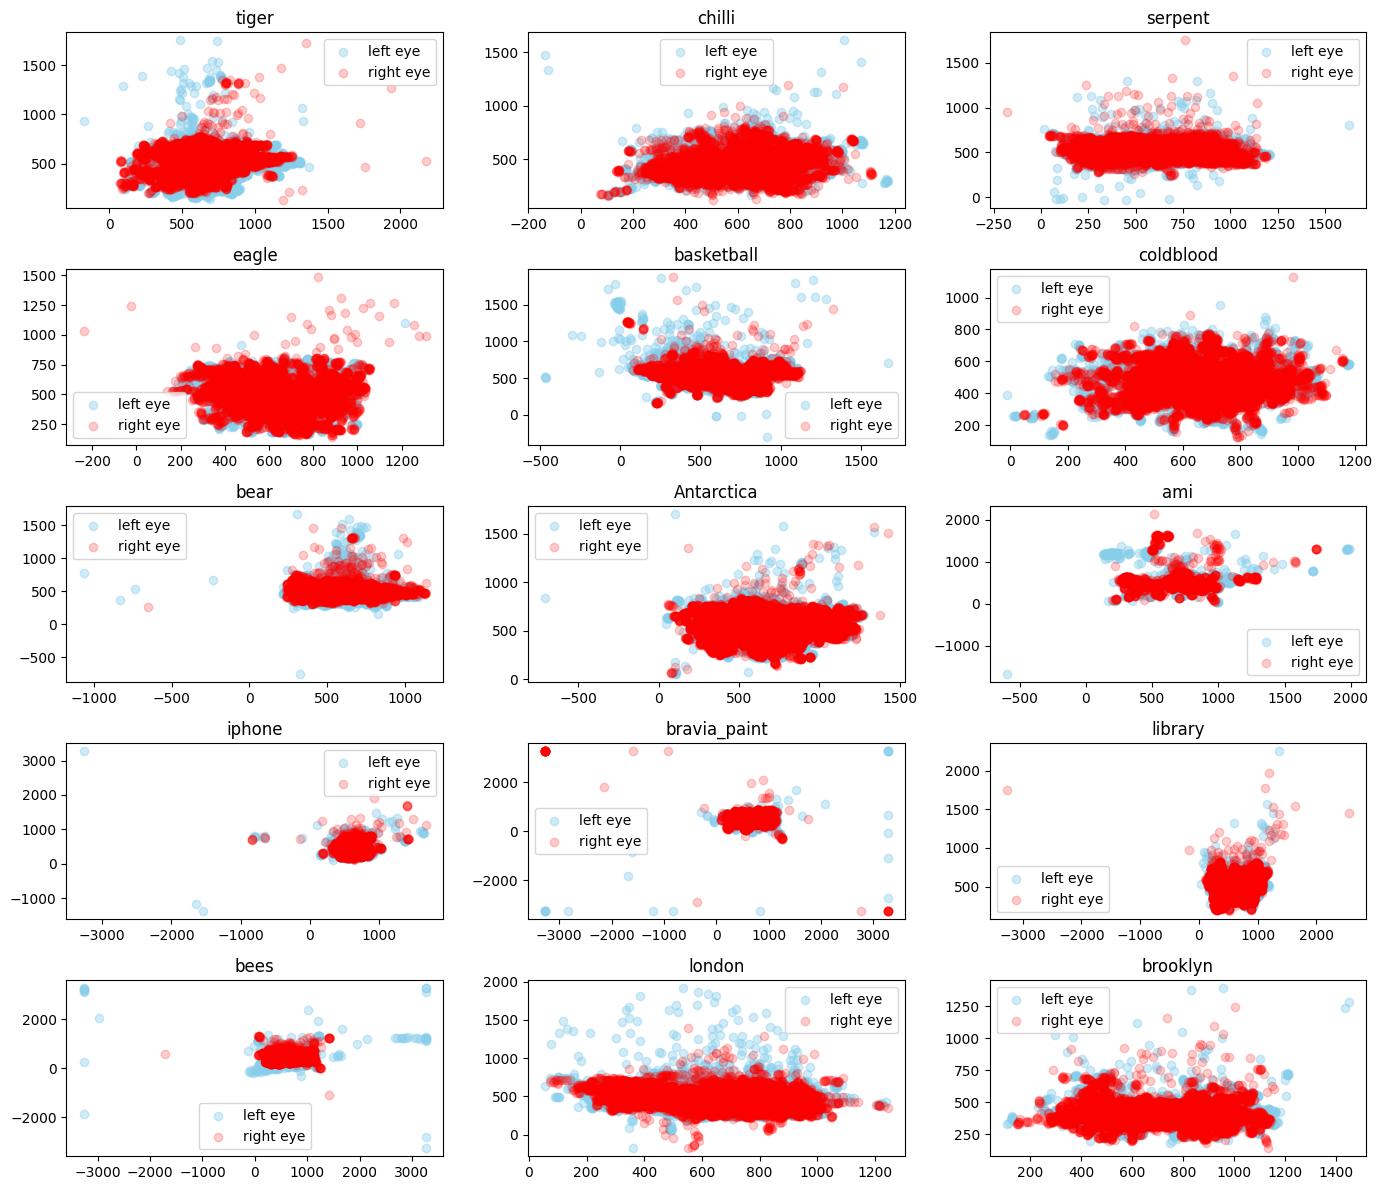

In [16]:
from matplotlib import pyplot as plt
from matplotlib import colormaps
import numpy as np

labels = result_df["file_name"].unique()
grouped = result_df.groupby("file_name")

rows = 5
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(14, 12))
for i, label in enumerate(result_df["file_name"].unique()):
    x1 = result_df[result_df["file_name"] == label]["left_x"].values
    x2 = result_df[result_df["file_name"] == label]["right_x"].values
    y1 = result_df[result_df["file_name"] == label]["left_y"].values
    y2 = result_df[result_df["file_name"] == label]["right_y"].values
    row = i // cols
    col = i % cols
    # Get the current subplot object
    axis = ax[row, col]
    # Scatter plot
    axis.scatter(x1, y1, alpha=0.4, label='left eye',color='skyblue')
    axis.scatter(x2, y2, alpha=0.2, label='right eye',color='red')
    axis.set_title(label)
    axis.legend()

# Adjust spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()


In [23]:
filter_df=result_df
# Calculate focus_x and focus_y and add them to the DataFrame
filter_df['focus_x'] = (filter_df['left_x'] + filter_df['right_x']) / 2
filter_df['focus_y'] = (filter_df['left_y'] + filter_df['right_y']) / 2
filter_df['dil'] = (filter_df['left_dil'] + filter_df['right_dil']) / 2

filter_df.head()

,frame,left_x,left_y,left_dil,left_event,right_x,right_y,right_dil,right_event,Label,file_name,focus_x,focus_y,dil
0,1,671.0,446.6,1020.0,1,632.6,501.0,1096.0,1,00001,tiger,651.80,473.80,1058.0
1,2,669.5,449.8,1023.0,1,634.0,503.5,1090.0,1,00001,tiger,651.75,476.65,1056.5
2,3,668.8,446.8,1028.0,1,635.6,506.0,1093.0,1,00001,tiger,652.20,476.40,1060.5
3,4,672.1,449.8,1032.0,1,630.1,505.3,1094.0,1,00001,tiger,651.10,477.55,1063.0
4,5,668.6,446.6,1040.0,1,634.6,501.0,1103.0,1,00001,tiger,651.60,473.80,1071.5


### Specifying eye focus for different resolution videos respectively

In [24]:
df=filter_df
# Scale the video to 1280*720 in both horizontal and 
# vertical coordinates, then the eye movement coordinates 
# have to be scaled as well
df.loc[df['file_name'] == 'bees', 'focus_x'] *= 1.25
df.loc[df['file_name'] == 'bees', 'focus_y'] *= 1.25

df.loc[df['file_name'] == 'library', 'focus_x'] *= 1.25
df.loc[df['file_name'] == 'library', 'focus_y'] *= 1.25

df.loc[df['file_name'] == 'ami', 'focus_x'] *= 1.78
df.loc[df['file_name'] == 'ami', 'focus_y'] *= 2.22

df.loc[df['file_name'] == 'Antarctica', 'focus_x'] *= 1.02

df.loc[df['file_name'] == 'bear', 'focus_x'] *= 1.2
df.loc[df['file_name'] == 'bear', 'focus_y'] *= 1.01

df.loc[df['file_name'] == 'basketball', 'focus_x'] *= 1.33

df.loc[df['file_name'] == 'eagle', 'focus_x'] *= 1.38

df.loc[df['file_name'] == 'serpent', 'focus_y'] *= 1.02


In [25]:
df.describe()

,frame,left_x,left_y,left_dil,left_event,right_x,right_y,right_dil,right_event,focus_x,focus_y,dil
count,150000.00000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,1231.01224,647.297911,489.049621,1191.155407,1.087313,646.652223,490.899727,1206.477833,0.989120,742.452205,548.781626,1198.816620
std,982.86467,198.945695,132.300131,381.369834,0.325981,195.904263,132.446331,388.045039,0.103739,264.656048,217.521670,368.436916
min,1.00000,-3270.000000,-3270.000000,148.000000,0.000000,-3270.000000,-3270.000000,138.000000,0.000000,-3270.000000,-3270.000000,192.000000
25%,461.00000,523.300000,412.500000,929.000000,1.000000,523.700000,414.500000,916.000000,1.000000,569.868000,426.625000,929.000000
50%,925.00000,652.400000,484.100000,1140.000000,1.000000,651.400000,486.900000,1160.000000,1.000000,704.050000,502.900000,1147.000000
75%,1866.00000,768.200000,555.200000,1399.000000,1.000000,766.900000,556.700000,1432.000000,1.000000,885.840000,605.300000,1409.000000
max,4319.00000,3270.000000,3270.000000,7142.000000,2.000000,3270.000000,3270.000000,3392.000000,1.000000,3321.302000,3700.185000,4627.500000


In [26]:
df.isna().any()

frame          False
left_x         False
left_y         False
left_dil       False
left_event     False
right_x        False
right_y        False
right_dil      False
right_event    False
Label          False
file_name      False
focus_x        False
focus_y        False
dil            False
dtype: bool

# Cluster the data

### Plot in 2D

Now we can use PCA to reduce the dataset to only 2 dimensions. This means we can plot it on a 2D axis.

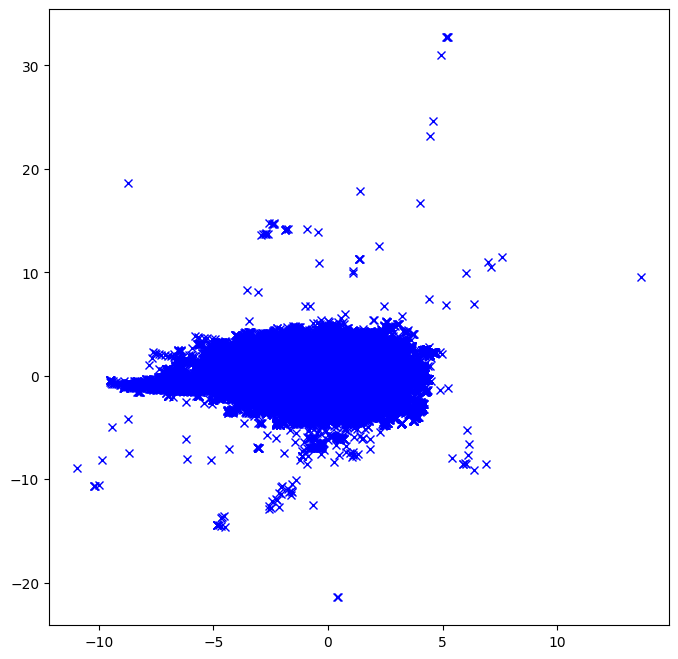

In [27]:
import random, os, sys, shutil
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = df
x = x.dropna()
x_scaled = x.drop("file_name", axis = 1)

#Standardise
x_scaled = StandardScaler().fit_transform(x_scaled)
#Get reduced dimensions
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x_scaled)
#Plot
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

### Elbow Plot

Whats the best value of **k**? We can look for the **elbow** that shows a big jump in **inertia** before a flattening off. Here we plot the first 50 values of k.

/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The 

([<matplotlib.axis.XTick at 0x2b47a9040>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20')])

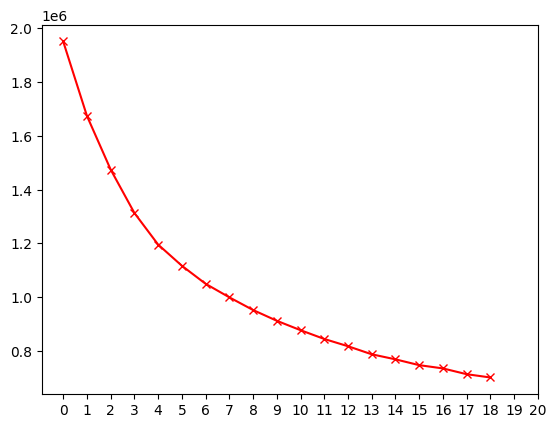

In [28]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(X)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=labels, alpha=0.3)
    plot_centroids(clusterer.cluster_centers_)

scores=[]
for i in range(1,20):
    #Fit for k
    means=KMeans(n_clusters=i)
    means.fit(x_scaled)
    #Get inertia
    scores.append(means.inertia_)
plt.plot(scores,"-rx")
plt.xticks(np.arange(0, 21, 1.0))

/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


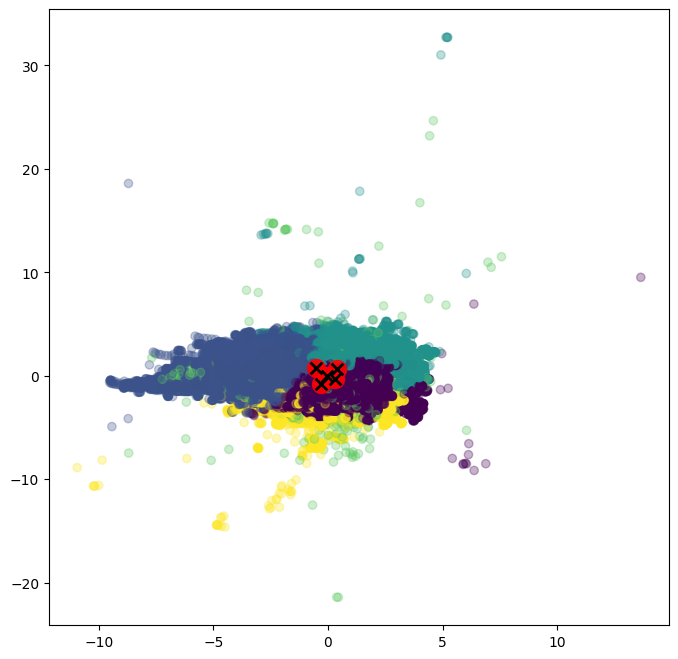

In [43]:
k=5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_scaled)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x_scaled)

/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


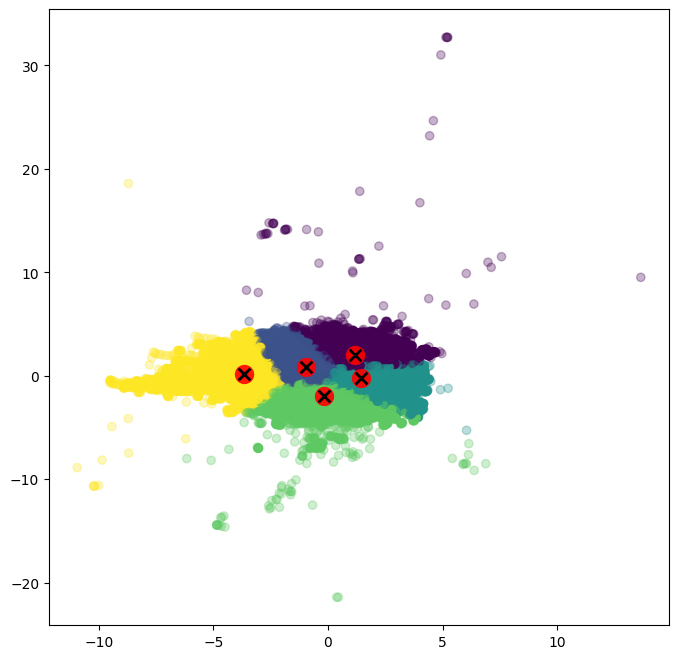

In [44]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 2 

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x_scaled)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results on 2D plot
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)

### plot the Cluster

/var/folders/1l/ygt81nk5749f3hs2_wj4msx00000gn/T/ipykernel_67770/2478591304.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cool')


Text(0.5, 0, 'cluster number')

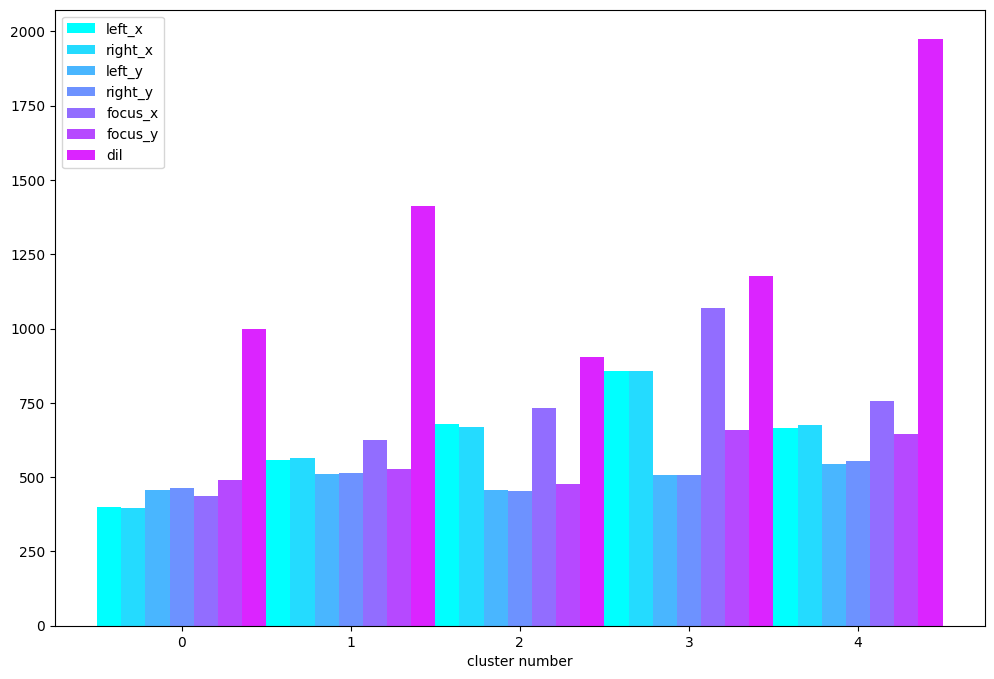

In [45]:
#Add cluster labels as extra column in dataframe
labels = kmeans.predict(x_less_dimensions)
x["cluster"] = labels

#Pick some features to plot
features = ['left_x', 'right_x', 'left_y', 'right_y','focus_x','focus_y','dil']
width = 1/(len(features))

fig,ax = plt.subplots(figsize=(12, 8))

for i in range(k):
    ax.bar([i],[1],width=width*4,color = "azure" if i%2==0 else "whitesmoke")

cmap = plt.cm.get_cmap('cool')
#Iterate through features
for index, f in enumerate(features):
    #Get mean for each feature for each cluster
    data = [np.mean(x[x["cluster"]==i][f]) for i in range(k)]
    
    x_vals = np.arange(len(data)) + (width*index) - 0.5 + width/2
    
    #Plot this feature for each cluster
    ax.bar(x_vals, data, width = width, label = f, color = cmap(index/len(features)))
    
ax.legend()
ax.set_xlabel("cluster number")

# Descibe the Cluster

In [51]:
cluster0=pd.DataFrame(x[x['cluster'] == 0])
cluster1=pd.DataFrame(x[x['cluster'] == 1])
cluster2=pd.DataFrame(x[x['cluster'] == 2])
cluster3=pd.DataFrame(x[x['cluster'] == 3])
cluster4=pd.DataFrame(x[x['cluster'] == 4])
cluster0

,frame,left_x,left_y,left_dil,left_event,right_x,right_y,right_dil,right_event,Label,file_name,focus_x,focus_y,dil,cluster
176,183,321.4,594.9,1317.0,1,269.5,601.5,1330.0,1,00001,tiger,295.45,598.20,1323.5,0
177,184,327.2,595.3,1263.0,1,269.0,599.2,1288.0,1,00001,tiger,298.10,597.25,1275.5,0
178,185,336.2,592.2,1221.0,1,270.6,599.5,1255.0,1,00001,tiger,303.40,595.85,1238.0,0
179,186,333.1,592.5,1193.0,1,274.1,608.6,1232.0,1,00001,tiger,303.60,600.55,1212.5,0
180,187,334.1,583.6,1174.0,1,277.4,615.6,1232.0,1,00001,tiger,305.75,599.60,1203.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149989,2831,324.2,363.6,1270.0,1,365.8,381.8,1292.0,1,00003,brooklyn,345.00,372.70,1281.0,0
149990,2832,325.8,374.0,1268.0,1,364.7,384.6,1297.0,1,00003,brooklyn,345.25,379.30,1282.5,0
149991,2833,329.3,371.8,1274.0,1,364.6,387.2,1305.0,1,00003,brooklyn,346.95,379.50,1289.5,0
149992,2834,333.3,377.8,1279.0,1,370.4,388.9,1308.0,1,00003,brooklyn,351.85,383.35,1293.5,0


In [52]:
cluster0.describe()

,frame,left_x,left_y,left_dil,left_event,right_x,right_y,right_dil,right_event,focus_x,focus_y,dil,cluster
count,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,23567.0
mean,1080.790555,399.181937,456.406772,995.180634,1.085077,395.694700,461.860250,1001.268978,0.991471,434.865283,490.345000,998.224806,0.0
std,930.629945,148.012193,158.955141,221.838173,0.327812,156.661104,152.929189,227.957357,0.091959,139.501458,163.207178,199.080580,0.0
min,2.000000,-3270.000000,-3270.000000,156.000000,0.000000,-3270.000000,-3270.000000,152.000000,0.000000,-3270.000000,-3270.000000,236.000000,0.0
25%,406.000000,329.200000,370.600000,860.000000,1.000000,327.700000,371.300000,850.000000,1.000000,371.100000,385.050000,868.000000,0.0
50%,781.000000,412.900000,459.400000,987.000000,1.000000,411.100000,461.600000,987.000000,1.000000,448.350000,472.750000,986.000000,0.0
75%,1569.000000,483.950000,543.100000,1146.000000,1.000000,480.200000,537.800000,1150.000000,1.000000,515.304250,563.575000,1129.000000,0.0
max,4319.000000,3270.000000,3270.000000,1812.000000,2.000000,3270.000000,3270.000000,1869.000000,1.000000,799.665000,2257.900000,1685.500000,0.0


In [53]:
cluster1.describe()

,frame,left_x,left_y,left_dil,left_event,right_x,right_y,right_dil,right_event,focus_x,focus_y,dil,cluster
count,36700.000000,36700.000000,36700.000000,36700.000000,36700.000000,36700.000000,36700.000000,36700.000000,36700.000000,36700.000000,36700.00000,36700.000000,36700.0
mean,1406.443351,557.500251,509.271899,1394.176431,1.095123,565.186973,515.077485,1431.245640,0.993351,623.299889,528.62750,1412.711035,1.0
std,976.554668,125.482589,119.738639,202.631312,0.323765,125.420636,113.093342,223.723818,0.081268,135.544332,130.00761,181.464735,0.0
min,1.000000,-178.100000,-173.900000,298.000000,0.000000,-3270.000000,-81.500000,636.000000,0.000000,-14.350000,-108.50000,569.500000,1.0
25%,613.000000,473.500000,434.200000,1254.000000,1.000000,484.275000,444.800000,1276.000000,1.000000,538.740750,446.55000,1280.000000,1.0
50%,1225.000000,573.800000,502.800000,1390.000000,1.000000,580.800000,507.900000,1412.000000,1.000000,631.200000,515.60000,1408.000000,1.0
75%,2086.000000,651.800000,578.200000,1523.000000,1.000000,655.800000,587.100000,1576.000000,1.000000,719.205000,595.95000,1537.500000,1.0
max,4319.000000,3270.000000,1785.800000,2194.000000,2.000000,996.300000,3270.000000,2197.000000,1.000000,1123.091000,2542.45500,2101.000000,1.0


In [54]:
cluster2.describe()

,frame,left_x,left_y,left_dil,left_event,right_x,right_y,right_dil,right_event,focus_x,focus_y,dil,cluster
count,41077.000000,41077.000000,41077.000000,41077.000000,41077.000000,41077.000000,41077.000000,41077.000000,41077.000000,41077.000000,41077.000000,41077.000000,41077.0
mean,1176.314044,679.316586,455.629430,906.942377,1.075833,669.968574,452.623079,904.234194,0.986927,732.347548,475.641224,905.588285,2.0
std,947.904048,97.482391,105.404723,204.517732,0.312868,91.875720,105.259933,195.225123,0.113589,129.487396,125.590471,174.944952,0.0
min,1.000000,93.400000,-321.300000,152.000000,0.000000,-170.600000,-1090.600000,143.000000,0.000000,419.900000,-358.625000,192.000000,2.0
25%,440.000000,612.900000,385.300000,788.000000,1.000000,608.100000,382.500000,787.000000,1.000000,635.250000,396.050000,800.500000,2.0
50%,865.000000,665.200000,458.500000,916.000000,1.000000,658.100000,454.700000,905.000000,1.000000,708.900000,467.550000,908.000000,2.0
75%,1792.000000,735.600000,511.100000,1041.000000,1.000000,725.700000,508.300000,1038.000000,1.000000,801.500000,534.125000,1028.500000,2.0
max,3959.000000,1105.500000,1329.900000,1694.000000,2.000000,1425.900000,1335.100000,1684.000000,1.000000,1582.125000,1310.700000,1534.500000,2.0


In [55]:
cluster3.describe()

,frame,left_x,left_y,left_dil,left_event,right_x,right_y,right_dil,right_event,focus_x,focus_y,dil,cluster
count,36201.000000,36201.000000,36201.000000,36201.000000,36201.000000,36201.000000,36201.000000,36201.000000,36201.000000,36201.000000,36201.000000,36201.000000,36201.0
mean,1124.565564,857.206884,508.663926,1165.303914,1.087981,856.718099,507.038576,1191.729704,0.985249,1069.732768,657.026678,1178.516809,3.0
std,992.652663,136.261668,132.122198,243.758470,0.333439,123.318419,138.039687,278.712720,0.120556,192.141941,286.580365,239.935796,0.0
min,1.000000,144.900000,-3270.000000,148.000000,0.000000,330.100000,-3270.000000,138.000000,0.000000,625.005000,-1740.437500,192.000000,3.0
25%,375.000000,762.000000,434.900000,976.000000,1.000000,768.100000,435.000000,995.000000,1.000000,912.480000,456.350000,994.500000,3.0
50%,769.000000,847.100000,497.600000,1167.000000,1.000000,850.800000,498.900000,1200.000000,1.000000,1061.062500,553.000000,1182.000000,3.0
75%,1688.000000,933.300000,570.900000,1330.000000,1.000000,926.000000,568.100000,1382.000000,1.000000,1217.164000,809.812500,1353.000000,3.0
max,4250.000000,3270.000000,3270.000000,2622.000000,2.000000,3270.000000,2125.300000,2303.000000,1.000000,3321.302000,3700.185000,2462.500000,3.0


In [56]:
cluster4.describe()

,frame,left_x,left_y,left_dil,left_event,right_x,right_y,right_dil,right_event,focus_x,focus_y,dil,cluster
count,12455.000000,12455.000000,12455.000000,12455.000000,12455.000000,12455.000000,12455.000000,12455.000000,12455.000000,12455.000000,12455.000000,12455.000000,12455.0
mean,1488.119149,665.666238,544.439430,1976.232437,1.104456,674.089410,553.934412,1972.141228,0.990686,757.624925,645.340562,1974.186833,4.0
std,1056.416840,177.440096,149.261417,384.793689,0.347408,166.886281,156.604283,315.439287,0.096060,239.267456,332.026197,312.472989,0.0
min,1.000000,-3270.000000,-1856.700000,930.000000,0.000000,-3270.000000,91.500000,943.000000,0.000000,-1424.750000,-1073.625000,939.500000,4.0
25%,618.000000,575.900000,468.200000,1685.000000,1.000000,601.000000,479.350000,1776.500000,1.000000,609.600000,483.550000,1772.000000,4.0
50%,1232.000000,678.400000,527.000000,1892.000000,1.000000,687.800000,536.200000,1932.000000,1.000000,732.600000,555.350000,1926.500000,4.0
75%,2258.000000,775.600000,585.650000,2219.000000,1.000000,771.150000,602.650000,2123.000000,1.000000,862.025000,664.118750,2082.500000,4.0
max,4017.000000,3270.000000,3270.000000,7142.000000,2.000000,1759.400000,3270.000000,3392.000000,1.000000,2931.037000,3270.000000,4627.500000,4.0
